In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
flowrate = pd.read_csv('Table 2.2-Flow Rates for Example 2.2.csv')

In [4]:
flowrate

,Sw,qo,qw
0,0.00,0.0600,0.000
1,0.20,0.0420,0.000
2,0.30,0.0300,0.010
3,0.40,0.0200,0.020
4,0.50,0.0130,0.035
5,0.60,0.0075,0.051
6,0.70,0.0040,0.068
7,0.80,0.0010,0.085
8,0.85,0.0000,0.096
9,1.00,0.0000,0.250


Text(0.5, 1.0, 'Flow Rates')

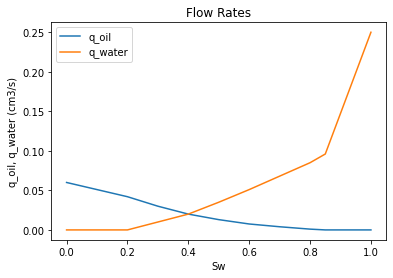

In [5]:
# plot data
p1 = plt.plot(flowrate.Sw, flowrate.qo)
p2 = plt.plot(flowrate.Sw, flowrate.qw)
plt.xlabel("Sw"); plt.ylabel("q_oil, q_water (cm3/s)")
plt.legend((p1[0], p2[0]), ('q_oil', 'q_water'))
plt.title("Flow Rates")

Text(0.5, 1.0, 'Relative Permeabilities')

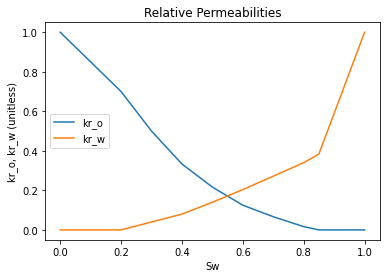

In [6]:
#calculate relative permeabilities of oil and water"
kr_o = flowrate.qo / flowrate.qo[0] #qo per q0 at Sw=0
kr_w = flowrate.qw / flowrate.qw[9] #qw per qw at Sw=1

# plot result
p1 = plt.plot(flowrate.Sw, kr_o)
p2 = plt.plot(flowrate.Sw, kr_w)
plt.xlabel("Sw"); plt.ylabel("kr_o, kr_w (unitless)")
plt.legend((p1[0], p2[0]), ('kr_o', 'kr_w'))
plt.title("Relative Permeabilities")

Text(0.5, 1.0, 'Phase Permeabilities')

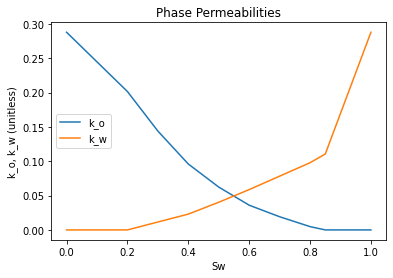

In [7]:
#phase permeabilities of oil and water"

#known
mu_oil = 5 #oil viscosity, cP
mu_water = 1.2 #water viscosity, cP
core_length = 12 #cm
dP = -2.5 #negative because of pressure drop, atm
core_area = 5 #cm2


k_o = -(flowrate.qo * mu_oil / core_area) / (dP / core_length)
k_w = -(flowrate.qw * mu_water / core_area) / (dP / core_length)

# plot result
p1 = plt.plot(flowrate.Sw, k_o)
p2 = plt.plot(flowrate.Sw, k_w)
plt.xlabel("Sw"); plt.ylabel("k_o, k_w (unitless)")
plt.legend((p1[0], p2[0]), ('k_o', 'k_w'))
plt.title("Phase Permeabilities")

In [9]:
#Leverett J function for different sets of core"

# known
sigma = 72 # interfacial tension, in dyne/cm
theta = 45 # angle of wettability


# capillary pressure in psi
capilar = pd.read_csv('Table 2.3-Capillary Pressure Sets for Example 2.3.csv')
capilar.head()

# Pc_1: capillary pressure of core 1, at 1 md and poro 0.08
# Pc_2: capillary pressure of core 2, at 15 md and poro 0.11
# Pc_3: capillary pressure of core 3, at 100 md and poro 0.15
# Pc_4: capillary pressure of core 4, at 500 md and poro 0.22

,sw,Pc_1,Pc_2,Pc_3,Pc_4
0,15.0,93.59,28.34,12.82,6.94
1,16.0,66.48,20.13,9.10,4.93
2,17.0,46.54,14.09,6.37,3.45
3,18.0,39.89,12.08,5.46,2.96
4,19.0,33.24,10.06,4.55,2.47


In [10]:
sigma = 72 * (1/68947.57) # from dyne/cm convert to psi/cm, 1 psi = 68947.57 dyne/cm2


# permeability must be in unit cm2 to match with sigma dyne/cm
k_1 = (1 / 1000) * (0.98689233 * 1E-08) # permeability of core 1, 1 darcy = 100 md = 0.98689233 micro.m2 = ... * 1E-08 cm2
k_2 = (15 / 1000) * (0.98689233 * 1E-08)
k_3 = (100 / 1000) * (0.98689233 * 1E-08)
k_4 = (500 / 1000) * (0.98689233 * 1E-08)

poro_1 = 0.08 # porosity of core 1
poro_2 = 0.11
poro_3 = 0.15
poro_4 = 0.22

In [11]:
J_1 = (capilar.Pc_1 / (sigma * np.cos(np.deg2rad(theta)))) * np.sqrt(k_1 / poro_1)
J_2 = (capilar.Pc_2 / (sigma * np.cos(np.deg2rad(theta)))) * np.sqrt(k_2 / poro_2)
J_3 = (capilar.Pc_3 / (sigma * np.cos(np.deg2rad(theta)))) * np.sqrt(k_3 / poro_3)
J_4 = (capilar.Pc_4 / (sigma * np.cos(np.deg2rad(theta)))) * np.sqrt(k_4 / poro_4)
J = pd.DataFrame({"Sw":capilar.sw, "Leverett_1":J_1, "Leverett_2":J_2, "Leverett_3":J_3, "Leverett_4":J_4})
J.head()

,Sw,Leverett_1,Leverett_2,Leverett_3,Leverett_4
0,15.0,1.407735,1.407944,1.408247,1.407568
1,16.0,0.999959,1.000068,0.999614,0.999901
2,17.0,0.700032,0.699998,0.699729,0.699728
3,18.0,0.600006,0.600140,0.599768,0.600346
4,19.0,0.499980,0.499785,0.499807,0.500965


Text(0.5, 1.0, 'Leverett J-Function')

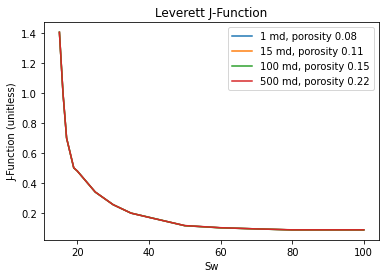

In [12]:
# plot Leverett function result
p1 = plt.plot(J[['Sw']], J[['Leverett_1']])
p2 = plt.plot(J[['Sw']], J[['Leverett_2']])
p3 = plt.plot(J[['Sw']], J[['Leverett_3']])
p4 = plt.plot(J[['Sw']], J[['Leverett_4']])
plt.xlabel("Sw"); plt.ylabel("J-Function (unitless)")
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('1 md, porosity 0.08', '15 md, porosity 0.11', '100 md, porosity 0.15', '500 md, porosity 0.22'))
plt.title("Leverett J-Function")

In [13]:
pressure = 2010 # in psia
temp = 75 # in deg F
sg = 0.7 # specific gravity
x_h2s = 0.07 # mole fraction
x_co2 = 0.1

temp = temp + 459.67 # convert to Rankine

# calculate pseudocritical properties (Sutton, valid for 0.57
P_pc = 756.8 - (131.07 * sg) - (3.6 * sg**2)
T_pc = 169.2 + (349.50 * sg) - (74 * sg**2) # in Rankine

# calculate adjustment to pseudocritical properties for sour gas (Wiechert-Aziz, valid for x_co2<0.544 and x_h2s<0.738)
e = (120 * (((x_h2s + x_co2)**0.9) - ((x_h2s + x_co2)**1.6))) + (15 * (x_h2s**0.5 - x_h2s**4))
T_pc_corr = T_pc - e # corrected T_pc
P_pc_corr = (P_pc * T_pc_corr) / (T_pc - x_h2s * e * (1-x_h2s))

# calculate pseudoreduced properties
P_pr = pressure / P_pc_corr
T_pr = temp / T_pc_corr

print("Gas pseudocritical temperature: ",T_pc_corr, "deg Rankine")
print("Gas pseudocritical pressure: ",P_pc_corr, "psia")
print("Gas pseudoreduced temperature: ",T_pr)
print("Gas pseudoreduced pressure: ",P_pr)

Gas pseudocritical temperature:  356.31219397078127 deg Rankine
Gas pseudocritical pressure:  628.2143047814683 psia
Gas pseudoreduced temperature:  1.5005661019949397
Gas pseudoreduced pressure:  3.1995450990234966


In [14]:
z = 0.772 # according to book
print("Gas compressibility factor from Standing graph: ",z)

Gas compressibility factor from Standing graph:  0.772


In [15]:


R = 10.732 # gas constant in (ft3*psi)/(lb-mol*R), see gas constants above
rhogas = (28.97 * sg * pressure) / (z * R * temp)
print("Gas density: ",rhogas, "lbm/ft3")

Gas density:  9.201503836047605 lbm/ft3


In [16]:
Bg = 0.0282793 * z * temp / pressure

print("Gas volume factor: ",Bg, "res ft3/scf")

Gas volume factor:  0.005807319428622887 res ft3/scf


In [17]:
Mg = 28.97 * sg
# viscosity is traced using Fig 2.12 graph, also the corrections of h2s and co2
mu_ga = 0.0102 # in centipoise
mu_h2s_corr = 0.0002 # h2s corrector
mu_co2_corr = 0.0005 
mu_ga_corr = mu_ga + mu_h2s_corr + mu_co2_corr

mu_ratio = 1.55 # viscosity ratio traced from Fig 2.14 graph
mu_carr = mu_ga_corr * mu_ratio

# alternative to book: use Lee et al
K = ((0.00094 + 2E-06)*(temp**1.5)) / (209 + 19*Mg + temp)
rhogas_lee = rhogas * 0.0160185 # lbm/ft3 converted to gas density unit of Lee et al (g/cm3)
x = 3.5 + (986 / temp) + (0.01 * Mg)
y = 2.4 - 0.2*x

mu_lee = K * np.exp(x * (rhogas_lee**y))

print("Gas viscosity using Carr et al: ",mu_carr,"cP")
print("Gas viscosity using Lee et al: ",mu_lee,"cP")

Gas viscosity using Carr et al:  0.016895000000000004 cP
Gas viscosity using Lee et al:  0.01648326802386323 cP


In [18]:
trube_factor = 0.5 # is c_pr*T_pr
c_pr_graphical = trube_factor / T_pr
cgas_graphical = c_pr_graphical / P_pc_corr # pseudocritical pressure (P_pc_corr) has been solved previously (Example 2.4)

# alternative: use Mattar et al analytical solution
rho_pr = (0.27 * P_pr) / (z * T_pr)

a1 = 0.3265; a2 = -1.0700; a3 = -0.5339; a4 = 0.01569; a5 = -0.05165; a6 = 0.5475
a7 = -0.7361; a8 = 0.1844; a9 = 0.1056; a10 = 0.6134; a11 = 0.7210

do = ((a1 + (a2/T_pr) + (a3/T_pr**3) +(a4/T_pr**4) + (a5/T_pr**5)) * rho_pr) + \
     (2 * ((a6 + (a7/T_pr) + (a8/T_pr**2))) * rho_pr**2) - \
     (5 * a9 * (((a7/T_pr) + (a8/T_pr**2))) * rho_pr**4) + (1 + (a11 * rho_pr**2) - (a11 * rho_pr**2)**2) \
     * ((2 * a10 * rho_pr / T_pr**3)*np.exp(-a11 * rho_pr**2))

c_pr_analytical = (1 / P_pr) - ((0.27 / (z**2 * T_pr)) * (do / (1 + ((rho_pr / z) * do))))
cgas_analytical = c_pr_analytical / P_pc_corr

print("Gas isothermal compressibility at 1 atm using Trube and Mattar: ",cgas_graphical,"psi^-1")
print("Gas isothermal compressibility at 1 atm using Mattar analytical: ",cgas_analytical,"psi^-1")

Gas isothermal compressibility at 1 atm using Trube and Mattar:  0.0005304043187384391 psi^-1
Gas isothermal compressibility at 1 atm using Mattar analytical:  0.00048026851516057723 psi^-1


### Python worked examples and problems from Reservoir Engineering textbooks (Brian Towler SPE Textbook Vol. 8, etc.)